# Exploratory Data Analysis for House Price Dataset in Kaggle 
Created on September 4, 2024 

Author: Xin (David) Zhao 




## Introduction

### Context of the problem
This notebook is an exploratory data analysis for the House Price dataset in Kaggle. 

### Objective 
The goal is to predict the final price of each home.

### Data source 
The dataset is split into two files: train.csv and test.csv. The train.csv file contains the training data, while the test.csv file contains the test data. The train.csv file contains 1460 observations and 81 columns, while the test.csv file contains 1459 observations and 80 columns. The target variable is the SalePrice column in the train.csv file.

## Data Description 

### Overview of the dataset 
The dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. 

### Feature definitions 

### Assumptions 

## Exploratory Data Analysis (EDA)

### Methodology for EDA 
1. Load data: Use `pandas` to load datasets from CSV, Excel or other forms  
2. Initial data overview: Inspect data structure and check the first few rows, columns, and data types  
3. Check for missing values: Identify missing values with `pandas` 
4. Handling missing data: Drop missing values, fill with mean/ median/ mode, or use more advanced methods such as KNN imputations
5. Identify and handle duplicates: Check for and remove duplicate rows
6. Outlier detection and handling: Use box plots or scatter plots to visually detect outliers; remove, transform, or use robust models less sensitive to outliers 
7. Feature analysis and data visualization: Visualize distribution - use histogram, KDE plots, or count plots for categorical variables; Correlation analysis - use a correlation matrix to identify relationships between numerical features 
8. Handle incorrect data types: Convert data types if necessary (eg. dates, categories)
9. Encode categorical variables: One-hot encoding - for nominal categorical variables; Label encoding - for ordinal categorical variables 
10. Scaling and normalization: Normalize or standardize features using `StandardScaler` or `MinMaxScaler` from `scikit-learn` for better performance in some models 
11. Feature analysis and selection: Identify features with low variance or high multicollinearity and consider removing them 

### Data cleaning process 

## Import necessary modules 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # for making plots 
import seaborn as sns # for making plots with seaborn 
from scipy.stats import chi2_contingency 
from scipy.stats import ttest_ind  # Module for T-test
import statsmodels.api as sm
from statsmodels.formula.api import ols  
from scipy.stats import pearsonr # Pearson Correlation 
from scipy import stats

Virtual Python Environment: base (Python 3.12.4)

### Reference
Example notebooks:
- Example [notebook 1](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python) 
- Example [notebook 2](https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf/notebook) 

Software documentation:
- [Pandas cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html)
- `Numpy` Learn: [Link](https://numpy.org/learn/)
- 10 min to `pandas`: [Link](https://pandas.pydata.org/docs/user_guide/10min.html)
- Quick start guide to `matplotlib`: [Link](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start) 
- Introductory notes to `seaborn`: [Link](https://seaborn.pydata.org/tutorial/introduction.html) 

## Step 1: Load Data

In [2]:
train_df = pd.read_csv('data/train.csv') # read the training data 

## Step 2: Initial Data Overview

In [3]:
# Inspect the data structure 
train_df.info() # get a summary of the data structure 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Check the first few rows of the data
train_df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# View index of data frame 
train_df.index 

RangeIndex(start=0, stop=1460, step=1)

In [6]:
# View columns of data frame 
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Step 3: Inspect Missing Values 

In [7]:
# Check for missing values 
pd.isna(train_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [8]:
# Summary of missing values counts in each variable 
missing_list = pd.isna(train_df).agg(lambda x: np.sum(x)) 
print(missing_list)  # Series 
print(missing_list.values) 



Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
[   0    0    0  259    0    0 1369    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  872    8    0
    0    0   37   37   38   37    0   38    0    0    0    0    0    0
    1    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  690   81   81   81    0    0   81   81    0    0    0    0    0
    0    0 1453 1179 1406    0    0    0    0    0    0]


In [9]:
# Display only variables that have missing values and counts 
var_with_na = list(missing_list[missing_list > 0].index) 
count_na = list(missing_list[missing_list > 0].values) 

# Create a directory with key and value representing positive variables and NA counts 
dict_na = dict(zip(var_with_na, count_na)) 
print(dict_na) 


{'LotFrontage': 259, 'Alley': 1369, 'MasVnrType': 872, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}


In [10]:
# Check missing values by rows 


## Step 4: Handle Missing Data 

In [11]:
# Treat missing values differently by variables
# 1. Drop numeric variables is missingness > 30% 
# 2. Drop any categorical variables with missingness
# 3. Fill median if missingness < 30% and variable is numeric (float or int)

# Create a data frame with columns, including variable name, NA counts, and NA percentage 
df_series = {
    "variable": dict_na.keys(),
    "na_count": dict_na.values() 
}

df_na = pd.DataFrame(df_series)
# Add a column na_percent 
unique_id_count = train_df["Id"].nunique() # 1460  
df_na["na_percent"] = df_na["na_count"] / unique_id_count * 100 

print(df_na.sort_values(by="na_percent"))


        variable  na_count  na_percent
9     Electrical         1    0.068493
3     MasVnrArea         8    0.547945
4       BsmtQual        37    2.534247
5       BsmtCond        37    2.534247
7   BsmtFinType1        37    2.534247
6   BsmtExposure        38    2.602740
8   BsmtFinType2        38    2.602740
15    GarageCond        81    5.547945
14    GarageQual        81    5.547945
13  GarageFinish        81    5.547945
12   GarageYrBlt        81    5.547945
11    GarageType        81    5.547945
0    LotFrontage       259   17.739726
10   FireplaceQu       690   47.260274
2     MasVnrType       872   59.726027
17         Fence      1179   80.753425
1          Alley      1369   93.767123
18   MiscFeature      1406   96.301370
16        PoolQC      1453   99.520548


In [12]:
# Add a column "datatype" 
data_type = train_df.dtypes  # Check data types of variables 
df_datatype = pd.DataFrame(data_type)
df_datatype_reset = df_datatype.reset_index() # Change index into a column 
df_datatype_reset = df_datatype_reset.rename(columns={"index": "variable", 0: "datatype"})  # Update column name 
print(df_datatype_reset)


         variable datatype
0              Id    int64
1      MSSubClass    int64
2        MSZoning   object
3     LotFrontage  float64
4         LotArea    int64
..            ...      ...
76         MoSold    int64
77         YrSold    int64
78       SaleType   object
79  SaleCondition   object
80      SalePrice    int64

[81 rows x 2 columns]


In [13]:
# Join df_datatype_reset and df_na on variable 
df_na_datatype = pd.merge(df_na, 
                          df_datatype_reset, 
                          on="variable", 
                          how="left") 

print(df_na_datatype.sort_values(by="na_percent")) 

        variable  na_count  na_percent datatype
9     Electrical         1    0.068493   object
3     MasVnrArea         8    0.547945  float64
4       BsmtQual        37    2.534247   object
5       BsmtCond        37    2.534247   object
7   BsmtFinType1        37    2.534247   object
6   BsmtExposure        38    2.602740   object
8   BsmtFinType2        38    2.602740   object
15    GarageCond        81    5.547945   object
14    GarageQual        81    5.547945   object
13  GarageFinish        81    5.547945   object
12   GarageYrBlt        81    5.547945  float64
11    GarageType        81    5.547945   object
0    LotFrontage       259   17.739726  float64
10   FireplaceQu       690   47.260274   object
2     MasVnrType       872   59.726027   object
17         Fence      1179   80.753425   object
1          Alley      1369   93.767123   object
18   MiscFeature      1406   96.301370   object
16        PoolQC      1453   99.520548   object


The data types for variables in the data frame:
- `int64`: Integer numbers
- `float64`: Floating-point numbers
- `object`: Typically used for strings
- `bool`: Boolean values
- `datetime64`: Date and time values
- `category`: Categorical data

In [14]:
# Find categorical variable (aka object)
na_object_index = df_na_datatype["datatype"] == "object"
na_object_variables = df_na_datatype[na_object_index]["variable"].tolist()

print(na_object_variables)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [15]:
non_object_variables = df_na_datatype["datatype"] != "object" 
print(non_object_variables)

0      True
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
Name: datatype, dtype: bool


In [16]:
# Store the remaining variables into a list 
df_na_float = df_na_datatype[non_object_variables] 

na_float_variables = df_na_float["variable"].values.tolist()
print(na_float_variables)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [17]:
# Drop categorical (object) variables with missing values from train data frame 
print(train_df.shape)
train_df_dropna = train_df.drop(columns=na_object_variables) 
print(train_df_dropna.shape) # Drop 16 categorical (object) variables 


(1460, 81)
(1460, 65)


In [18]:
# Fill median if missingness < 30% and variable is numeric (float or int)
sum_na = pd.isna(train_df_dropna).agg(lambda x: np.sum(x))  # NA counts before filling  

sum_na[sum_na != 0] # Check variables with missing values


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [19]:
# Exclude categorical variables from fillna operation
numerical_variables = df_na_float["variable"].values.tolist()
train_df_dropna[numerical_variables] = train_df_dropna[numerical_variables].fillna(train_df_dropna[numerical_variables].median(skipna=True))

# print(train_df_dropna) 
sum_na2 = pd.isna(train_df_dropna).agg(lambda x: np.sum(x))  # NA counts after filling 
sum_na2[sum_na2 != 0] # Check variables with missing values 


Series([], dtype: int64)

In [20]:
# The data frame for the following analysis, after processing missing data 
print(train_df_dropna) 

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ... 

## Step 5: Identify and Handle Duplicates

In [21]:
# Check for and remove duplicate rows
train_df_dropna.index.is_unique 


True

In [22]:
# Check for and remove duplicate columns 
train_df_dropna.columns.is_unique

True

## Step 6: Outlier detection and handling

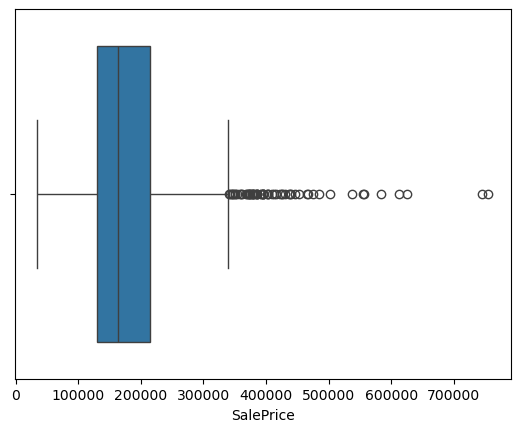

In [23]:
# Use box plots to check for outliers 
# Box plot for SalePrice
sns.boxplot(x = train_df_dropna["SalePrice"])
plt.show() 




Data points that lie below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers. 

In [24]:
# IQR (Interquartile range) method 
# Subset a variable from data frame as a Series 
sales_price = train_df_dropna["SalePrice"]
print(sales_price)



0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [25]:
# Apply numpy method percentile() to the Series 
q1_sales_price = np.percentile(sales_price, 25)  
q3_sales_price = np.percentile(sales_price, 75) 

IQR_sales_price = q3_sales_price - q1_sales_price 

# Lower- and upper- bound 
lower_bound = q1_sales_price - 1.5 * IQR_sales_price
upper_bound = q3_sales_price + 1.5 * IQR_sales_price
outliers_sales_price = [x for x in sales_price if x < lower_bound or x > upper_bound]  

print(len(outliers_sales_price))  # 61 possible outliers 


61


In [26]:
# Detect index to outliers in sales price 
# Create a data frame with index and SalePrice for potential outliers 
outlier_potential = train_df_dropna[(train_df_dropna["SalePrice"] < lower_bound) | (train_df_dropna["SalePrice"] > upper_bound)] 
print(outlier_potential.index)  # Index of potential outliers

Index([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,  309,
        313,  320,  321,  336,  349,  378,  389,  440,  473,  477,  481,  496,
        515,  527,  585,  591,  608,  642,  644,  654,  661,  664,  678,  688,
        691,  702,  718,  769,  774,  798,  803,  825,  877,  898,  987,  990,
       1046, 1142, 1169, 1181, 1182, 1228, 1243, 1267, 1268, 1353, 1373, 1388,
       1437],
      dtype='int64')


In [27]:
# Drop 61 possible outliers from the data frame 
train_df_dropna_clean = train_df_dropna.drop(index = outlier_potential.index)  
print(train_df_dropna_clean.shape) # 1399 rows and 65 columns    


(1399, 65)


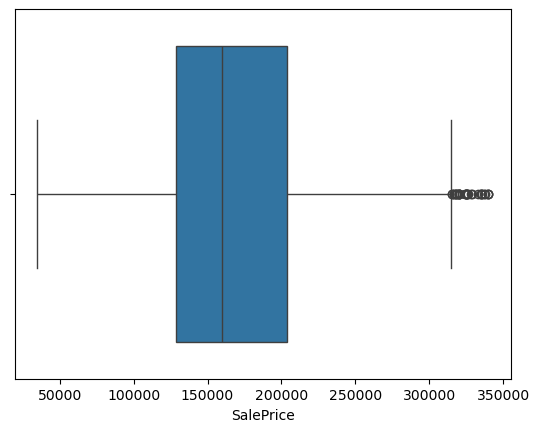

In [28]:
# Draw a box plot for SalePrice after removing outliers 
sns.boxplot(x = train_df_dropna_clean["SalePrice"]) 
plt.show() 

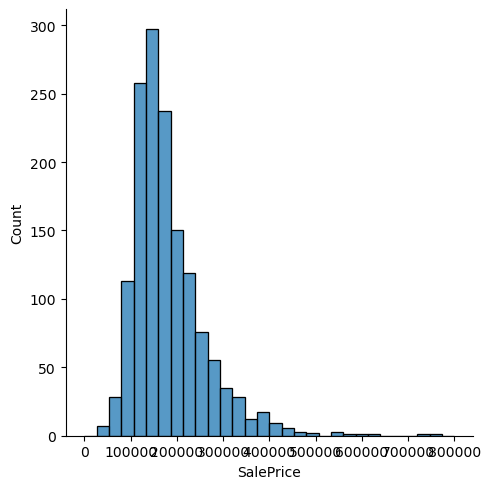

In [29]:
# Draw histogram for SalePrice before and after removing outliers 
sns.displot(x = train_df_dropna["SalePrice"], bins=30, binrange=(0, 800000)) # Before removing outliers 
plt.show()


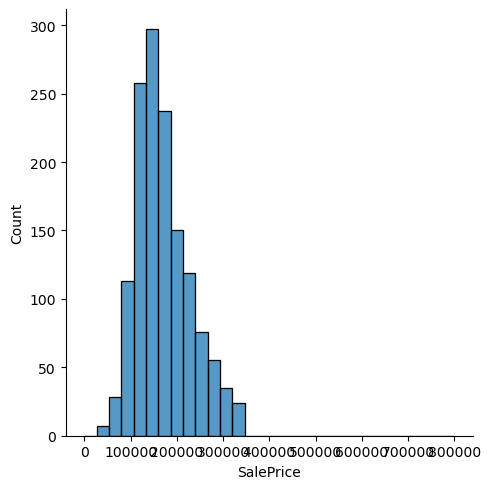

In [30]:
sns.displot(x = train_df_dropna_clean["SalePrice"], bins=30, binrange=(0, 800000)) # After removing outliers 
plt.show()

Investigate potential outliers for all numeric variables using the 1.5*IQR method 

In [31]:
# Identify samples outside the range of 1.5 * IQR + Q3 or Q1 - 1.5 * IQR 
# Create a function to detect outliers 

def detect_outlier(var):
    # Calculate IQR based on the list, x 
    q1 = np.quantile(var, 0.25)
    q3 = np.quantile(var, 0.75)
    iqr = q3 - q1 

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr 
    
    outlier = [True if x > upper_bound or x < lower_bound else False for x in var] 

    return outlier 


In [32]:
# Apply the above function to each numeric variable, and store results in a new data frame 
df_outlier = train_df_dropna_clean.select_dtypes(include=[np.number]).apply(detect_outlier) 

print(df_outlier) 

         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     False       False        False    False        False        False   
1     False       False        False    False        False         True   
2     False       False        False    False        False        False   
3     False       False        False    False        False        False   
4     False       False        False    False        False        False   
...     ...         ...          ...      ...          ...          ...   
1455  False       False        False    False        False        False   
1456  False       False        False    False        False        False   
1457  False       False        False    False        False         True   
1458  False       False        False    False        False        False   
1459  False       False        False    False        False        False   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0         False         F

`df.select_dtypes(include=[np.number]).apply(detect_outlier)`: Selects only the numeric columns in the DataFrame and applies the detect_outlier function to each column using the apply method.

In [33]:
# Calculate count of outliers in a sample
outlier_count = df_outlier.iloc[:, 1:].sum(axis=1, skipna=True) 

# Sort the series 
sorted_outlier_count = outlier_count.sort_values(ascending=False)

# Display the sorted result 
print(sorted_outlier_count)


1298    12
523      9
197      8
1350     7
1386     7
        ..
983      0
433      0
431      0
428      0
0        0
Length: 1399, dtype: int64


Why the count values are float rather than integers? 

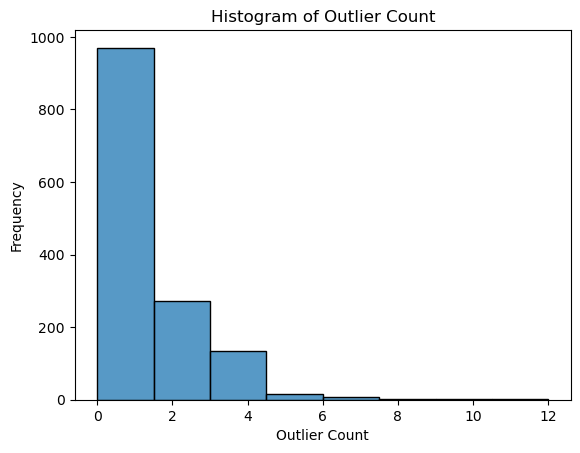

In [34]:
# Draw a histogram to represent outlier count 
sns.histplot(sorted_outlier_count, bins=8)

plt.xlabel("Outlier Count")
plt.ylabel("Frequency")
plt.title("Histogram of Outlier Count")

plt.show()

In [35]:
# Identify sample ID with more than 10 outliers 
sample_many_outliers = sorted_outlier_count[sorted_outlier_count >= 5].index
sample_many_outliers_list = sample_many_outliers.to_list() 
print(sample_many_outliers_list) 

[1298, 523, 197, 1350, 1386, 529, 635, 1230, 1173, 745, 1310, 304, 1328, 888, 260, 1030, 828, 1031, 1190, 93, 159, 991, 848, 961, 335]


In [36]:
# Drop samples with 10 or more outliers with index sample_many_outliers_list 
train_df_dropna_clean2 = train_df_dropna_clean.drop(index=sample_many_outliers_list)

print(train_df_dropna_clean2.shape)  # 1374 samples by 65 variables, for following analysis 


(1374, 65)


## Step 7: Feature Analysis and Data Visualization

### Correlation Analysis
- Categorical variables: Use histogram, KDE plots or count plots 
- Numerical variables: Use correlation matrix to represent correlation analysis 

In [37]:
# Identify categorical variables 
categorical_vars = train_df_dropna_clean2.select_dtypes(include=['object', 'category']) 

print(categorical_vars)

     MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... ExterCond Foundation Heating  \
0         CollgCr     

In [38]:
# Check data types for all the features 
data_types_features = train_df_dropna_clean2.dtypes

print(data_types_features)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 65, dtype: object


In [39]:
# Distribution of data types 
data_types_features.value_counts() 

int64      35
object     27
float64     3
Name: count, dtype: int64

In [40]:
# Todo:
# - Run chi-square test for pair-wise categorical variables
# - Draw heatmap matrix to visualize the results 

In [41]:
# Import necessary library 
from scipy.stats import chi2_contingency 

In [42]:
# Extract categorical variables 
categorical_vars_df = train_df_dropna_clean2.select_dtypes(include=['object']) 

print(categorical_vars_df) # 27 categorical variables for 1374 samples 


     MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... ExterCond Foundation Heating  \
0         CollgCr     

In [43]:
# Define a function to perform chi-square test 
def chi_square_test(df, var1, var2):
    contigency_table = pd.crosstab(df[var1], df[var2]) 
    chi2, p, dof, expected = chi2_contingency(contigency_table) 
    return chi2, p 

In [44]:
# Run pair-wise chi-square tests 
vars_list = categorical_vars_df.columns.to_list() 

results = [] # Initial dictionary
for var1 in vars_list:
    for var2 in vars_list:
        if var2 != var1:
            chi2, p = chi_square_test(categorical_vars_df, var1=var1, var2=var2)
            results.append({'Variable1': var1, 
                            'Variable2': var2,
                            'Chi2': chi2,
                            'p-value': p})            


In [45]:
# Convert the dictionary to DataFrame 
chi_square_results = pd.DataFrame(results) 

print(chi_square_results) 


         Variable1    Variable2         Chi2        p-value
0         MSZoning       Street   119.883194   5.657297e-25
1         MSZoning     LotShape   107.993676   1.490961e-17
2         MSZoning  LandContour    57.380917   6.746025e-08
3         MSZoning    Utilities     0.279533   9.910968e-01
4         MSZoning    LotConfig    37.373713   1.857297e-03
..             ...          ...          ...            ...
697  SaleCondition   CentralAir    20.673807   9.334220e-04
698  SaleCondition  KitchenQual   127.130577   7.740290e-20
699  SaleCondition   Functional    26.842443   6.315321e-01
700  SaleCondition   PavedDrive    37.653305   4.360311e-05
701  SaleCondition     SaleType  1552.600642  4.934832e-300

[702 rows x 4 columns]


In [46]:
# Create a pivot table for the heatmap
heatmap_data = chi_square_results.pivot(index="Variable1", columns="Variable2", values="p-value")

print(heatmap_data)

Variable2           BldgType    CentralAir    Condition1    Condition2  \
Variable1                                                                
BldgType                 NaN  2.731749e-26  1.823260e-03  1.549966e-18   
CentralAir      2.731749e-26           NaN  1.833964e-01  2.531813e-02   
Condition1      1.823260e-03  1.833964e-01           NaN  4.470944e-49   
Condition2      1.549966e-18  2.531813e-02  4.470944e-49           NaN   
ExterCond       2.099004e-13  6.255332e-12  5.927044e-01  1.191689e-86   
ExterQual       1.978169e-22  2.090987e-24  6.360949e-10  7.214030e-12   
Exterior1st     2.454081e-20  1.388601e-32  1.378034e-03  9.925477e-01   
Exterior2nd     2.419945e-29  1.202241e-29  7.543085e-05  9.998990e-01   
Foundation      1.825158e-36  1.532825e-38  1.135986e-04  3.197332e-02   
Functional      2.136373e-03  3.836723e-03  6.934247e-01  1.000000e+00   
Heating         7.074464e-09  6.498595e-63  8.214971e-01  1.000000e+00   
HeatingQC       9.669216e-13  1.395512

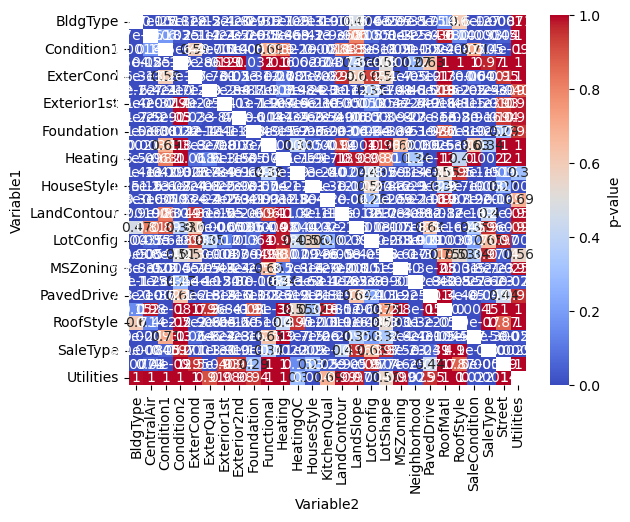

In [47]:
# Draw heatmap to visualize the results 
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.show()


### Aim: Compare the mean or median of sales prices within a categorical variable 

Statistical methods to implement the tasks include:
- T-test (for two categories)
- One-way ANOVA (for more than two categories) and Tukey's test for post-hoc analysis
- Kruskal-Wallis test (non-parametric ANOVA)
- Mann-Whitney U test (non-parametric T-test) 
- Linear regression 
- Logistic regression (for binary categorical outcomes)
- Generalized linear model (GLM)


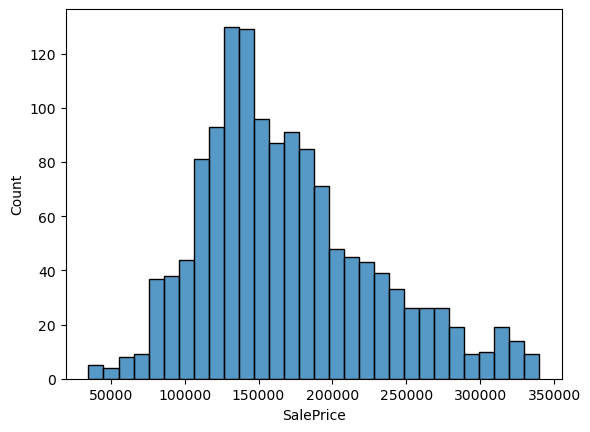

In [48]:
# Todo:
# - Draw histogram for sales price to investigate normality 
# - Use T-test to compare sales price between two groups 
# - Use ANOVA to compare sales price among multiple groups 

# Draw histogram for sales price 
sns.histplot(train_df_dropna_clean2["SalePrice"], bins=30) 
plt.show() 



In [49]:
# Use T-test to compare sales price between two groups 

# Identify binary categorical variables in the data frame 
# - Subset all the object variables 
# - Check unique values in each object variable 
# - Filter the object variable with two groups 

class_n = categorical_vars_df.nunique()
print(class_n)




MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        6
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
Heating           6
HeatingQC         5
CentralAir        2
KitchenQual       4
Functional        7
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64


In [50]:
class_n_df = class_n.to_frame(name="n_groups")
print(class_n_df)  

               n_groups
MSZoning              5
Street                2
LotShape              4
LandContour           4
Utilities             2
LotConfig             5
LandSlope             3
Neighborhood         25
Condition1            9
Condition2            6
BldgType              5
HouseStyle            8
RoofStyle             6
RoofMatl              7
Exterior1st          15
Exterior2nd          16
ExterQual             4
ExterCond             5
Foundation            6
Heating               6
HeatingQC             5
CentralAir            2
KitchenQual           4
Functional            7
PavedDrive            3
SaleType              9
SaleCondition         6


In [51]:
# Identify variables (index) which has only two groups
# - Store binary variable names into a list 
binary_variables = class_n_df.index[class_n_df["n_groups"] == 2].to_list()
print(binary_variables)


['Street', 'Utilities', 'CentralAir']


In [52]:
# Store the rest multi-class variable names into a list 
multiclass_variables = class_n_df.index[class_n_df["n_groups"] > 2].to_list()
print(multiclass_variables)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [53]:
# Write a function to implement T-test for binary variable and sales price 
def ttest_sales_prices(df, binary_var, target_var='SalePrice'):
    # Split the data into two groups based on the binary variable
    group1 = df[df[binary_var] == df[binary_var].unique()[0]][target_var]
    group2 = df[df[binary_var] == df[binary_var].unique()[1]][target_var]

    # Perform T-test 
    t_stat, p_value = ttest_ind(group1, group2)

    return t_stat, p_value
    


In [54]:
# Apply the defined function on binary variables and cleaned data set 
ttest_results = []
for var in binary_variables:
    t_stat, p_value = ttest_sales_prices(df=train_df_dropna_clean2, binary_var=var)
    # t_stat = round(t_stat, 2)
    # p_value = round(p_value, 2)  
    ttest_results.append({"variable": var, "stat": t_stat, "p-value": p_value, 'method':'ttest'})

print(ttest_results)    

[{'variable': 'Street', 'stat': 2.24126685332005, 'p-value': 0.025168178788862794, 'method': 'ttest'}, {'variable': 'Utilities', 'stat': 0.539902749433261, 'p-value': 0.5893517182089429, 'method': 'ttest'}, {'variable': 'CentralAir', 'stat': 11.47986906543842, 'p-value': 3.416899796492966e-29, 'method': 'ttest'}]


In [55]:
# Convert the list of dictionaries to a data frame 
ttest_results_df = pd.DataFrame(ttest_results) 
print(ttest_results_df)

     variable       stat       p-value method
0      Street   2.241267  2.516818e-02  ttest
1   Utilities   0.539903  5.893517e-01  ttest
2  CentralAir  11.479869  3.416900e-29  ttest


### Apply ANOVA test to categorical variables with more than two groups versus sale prices

In [56]:
# Write the function to implement ANOVA 
def anova_sale_price(df, var, target_var='SalePrice'):
    formula = f'{target_var} ~ C({var})'
    model = ols(formula, data=df).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)

    return anova_results

    

In [57]:
# Apply the function to data frame 
anova_results = []
for var in multiclass_variables:
    anova_result = anova_sale_price(df=train_df_dropna_clean2, var=var) 
    f_value = anova_result.iloc[0,2]
    p_value = anova_result.iloc[0,3]
    anova_results.append({'variable':var, 'stat':f_value, 'p-value':p_value, 'method':'anova'}) 

print(anova_results) 

[{'variable': 'MSZoning', 'stat': 67.89984144627759, 'p-value': 1.807329980863704e-52, 'method': 'anova'}, {'variable': 'LotShape', 'stat': 40.97969875433387, 'p-value': 2.3259663326808603e-25, 'method': 'anova'}, {'variable': 'LandContour', 'stat': 8.942052573542016, 'p-value': 7.222137503889276e-06, 'method': 'anova'}, {'variable': 'LotConfig', 'stat': 7.822802493350789, 'p-value': 3.117250055008816e-06, 'method': 'anova'}, {'variable': 'LandSlope', 'stat': 1.6915512726441746, 'p-value': 0.18461777919592387, 'method': 'anova'}, {'variable': 'Neighborhood', 'stat': 70.21472824635326, 'p-value': 2.065145857854093e-217, 'method': 'anova'}, {'variable': 'Condition1', 'stat': 8.311190285681786, 'p-value': 4.6897642895924676e-11, 'method': 'anova'}, {'variable': 'Condition2', 'stat': 3.354691848669515, 'p-value': 0.005127455124922134, 'method': 'anova'}, {'variable': 'BldgType', 'stat': 15.618389970491645, 'p-value': 1.6751606445832086e-12, 'method': 'anova'}, {'variable': 'HouseStyle', 's

Interpreting ANOVA output:

1. **sum_sq (Sum of Squares):**
- C(MSZoning): This represents the sum of squares between the groups (i.e., the variability due to the categorical variable Neighborhood).
- Residual: This represents the sum of squares within the groups (i.e., the variability within each group).

2. **df (Degrees of Freedom):**
- C(MSZoning): The degrees of freedom for the categorical variable, which is the number of groups minus one. In this case, there are 5 MSZoning, so the degrees of freedom is 4.
- Residual: The degrees of freedom for the residuals, which is the total number of observations minus the number of groups. In this case, there are 1374 observations and 5 groups, so the degrees of freedom is 1369.

3. **F (F-statistic):**
- The **F-statistic** is the ratio of the mean square between the groups to the mean square within the groups. It is used to determine if there are significant differences between the group means. A higher F-statistic indicates a greater likelihood that the group means are significantly different.

4. **PR(>F) (P-value):**
- The **p-value** associated with the F-statistic. It indicates the probability of observing the data if the null hypothesis (that all group means are equal) is true. A lower p-value (typically less than 0.05) suggests that there are significant differences between the group means.

In [58]:
# Convert dictionary to a data frame 
anova_df =  pd.DataFrame(anova_results)

# anova_df = anova_df.round(2)
print(anova_df)

         variable        stat        p-value method
0        MSZoning   67.899841   1.807330e-52  anova
1        LotShape   40.979699   2.325966e-25  anova
2     LandContour    8.942053   7.222138e-06  anova
3       LotConfig    7.822802   3.117250e-06  anova
4       LandSlope    1.691551   1.846178e-01  anova
5    Neighborhood   70.214728  2.065146e-217  anova
6      Condition1    8.311190   4.689764e-11  anova
7      Condition2    3.354692   5.127455e-03  anova
8        BldgType   15.618390   1.675161e-12  anova
9      HouseStyle   23.938083   7.151029e-31  anova
10      RoofStyle    5.152226   1.090998e-04  anova
11       RoofMatl    2.368522   2.791563e-02  anova
12    Exterior1st   22.547015   1.521961e-52  anova
13    Exterior2nd   19.482556   6.428913e-48  anova
14      ExterQual  379.165521  2.973203e-179  anova
15      ExterCond   12.938238   2.415841e-10  anova
16     Foundation  118.898491  1.434014e-104  anova
17        Heating    6.263029   9.384408e-06  anova
18      Heat

In [59]:
# Combine T-test and ANOVA outputs into a single data frame 
frames = [ttest_results_df, anova_df] 
combined_results = pd.concat(frames)

print(combined_results) # For the following visualization

         variable        stat        p-value method
0          Street    2.241267   2.516818e-02  ttest
1       Utilities    0.539903   5.893517e-01  ttest
2      CentralAir   11.479869   3.416900e-29  ttest
0        MSZoning   67.899841   1.807330e-52  anova
1        LotShape   40.979699   2.325966e-25  anova
2     LandContour    8.942053   7.222138e-06  anova
3       LotConfig    7.822802   3.117250e-06  anova
4       LandSlope    1.691551   1.846178e-01  anova
5    Neighborhood   70.214728  2.065146e-217  anova
6      Condition1    8.311190   4.689764e-11  anova
7      Condition2    3.354692   5.127455e-03  anova
8        BldgType   15.618390   1.675161e-12  anova
9      HouseStyle   23.938083   7.151029e-31  anova
10      RoofStyle    5.152226   1.090998e-04  anova
11       RoofMatl    2.368522   2.791563e-02  anova
12    Exterior1st   22.547015   1.521961e-52  anova
13    Exterior2nd   19.482556   6.428913e-48  anova
14      ExterQual  379.165521  2.973203e-179  anova
15      Exte

## Visualization of correlation between categorical variables and sale prices 

In [60]:
# Todo:
# - Create a column of -log(10)p
# - Order the row by -log(10)p 
# - Draw a scatter plot with X-axis representing 'stat' and Y-axis -log(10)p. 


In [61]:
# - Create a column of -log(10)p
combined_results['log(10)p'] = -np.log(combined_results['p-value'])

print(combined_results)

         variable        stat        p-value method    log(10)p
0          Street    2.241267   2.516818e-02  ttest    3.682175
1       Utilities    0.539903   5.893517e-01  ttest    0.528732
2      CentralAir   11.479869   3.416900e-29  ttest   65.546234
0        MSZoning   67.899841   1.807330e-52  anova  119.142574
1        LotShape   40.979699   2.325966e-25  anova   56.720492
2     LandContour    8.942053   7.222138e-06  anova   11.838360
3       LotConfig    7.822802   3.117250e-06  anova   12.678559
4       LandSlope    1.691551   1.846178e-01  anova    1.689468
5    Neighborhood   70.214728  2.065146e-217  anova  498.935764
6      Condition1    8.311190   4.689764e-11  anova   23.783054
7      Condition2    3.354692   5.127455e-03  anova    5.273146
8        BldgType   15.618390   1.675161e-12  anova   27.115112
9      HouseStyle   23.938083   7.151029e-31  anova   69.412882
10      RoofStyle    5.152226   1.090998e-04  anova    9.123247
11       RoofMatl    2.368522   2.791563

In [62]:
# - Order the row by -log(10)p and stat 
combined_results.sort_values(by=['log(10)p','stat'], ascending=False) 

,variable,stat,p-value,method,log(10)p
5,Neighborhood,70.214728,2.065146e-217,anova,498.935764
14,ExterQual,379.165521,2.973203e-179,anova,411.073092
19,KitchenQual,338.148119,2.683781e-164,anova,376.636729
16,Foundation,118.898491,1.434014e-104,anova,239.108372
18,HeatingQC,95.961078,5.064241e-72,anova,164.163923
12,Exterior1st,22.547015,1.521961e-52,anova,119.314425
0,MSZoning,67.899841,1.807330e-52,anova,119.142574
13,Exterior2nd,19.482556,6.428913e-48,anova,108.663279
9,HouseStyle,23.938083,7.151029e-31,anova,69.412882
2,CentralAir,11.479869,3.416900e-29,ttest,65.546234


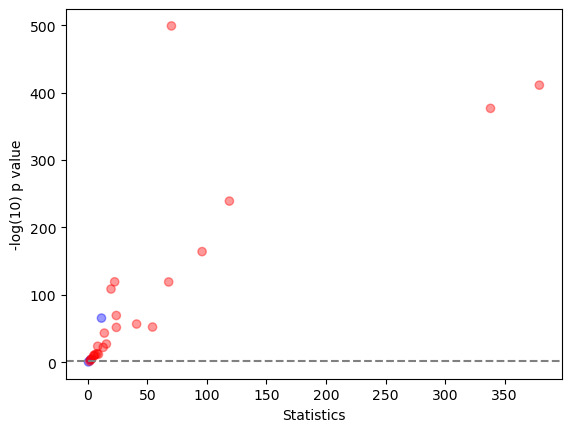

In [63]:
# - Draw a scatter plot with X-axis representing 'stat' and Y-axis -log(10)p

# Todo: 
# - Add a horizontal reference line at p-value cutoff -log10(0.05) = 1.3 
# - Color samples by method, ttest or anova
# - Decorate legends indicating full name for individual variables

color_dict = {'ttest':'blue', 'anova':'red'}
colors = combined_results['method'].map(color_dict)
plt.scatter(combined_results['stat'], combined_results['log(10)p'], c=colors, alpha=0.4)
plt.axhline(y=1.3, color='grey', linestyle='--') # Add a horizontal reference line at p-value cutoff -log10(0.05) = 1.3 
plt.xlabel('Statistics')
plt.ylabel('-log(10) p value')
plt.show()


## Correlation between numeric variables and sale prices 

In [64]:
# Todo:
# - Run Pearson correlation for numeric variables, including SalePrice. Assume normality for SalePrice and other variables. 
# - Draw a heatmap to visualize the correlation matrix 

In [65]:
print(train_df_dropna_clean2) # The data frame for the following analysis 

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ... 

In [66]:
numeric_vars = train_df_dropna_clean2.select_dtypes(include=[np.number]) # Select numeric variables
# Drop Id column
numeric_vars = numeric_vars.drop(columns='Id') 

In [67]:
correlation_matrix_pearson = numeric_vars.corr()
# print(heatmap_data.shape)
print(correlation_matrix_pearson.shape) 

(37, 37)


In [68]:
print(correlation_matrix_pearson)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.399688 -0.241906     0.076742    -0.078956   
LotFrontage     -0.399688     1.000000  0.303952     0.153689    -0.036275   
LotArea         -0.241906     0.303952  1.000000     0.070012     0.004874   
OverallQual      0.076742     0.153689  0.070012     1.000000    -0.079237   
OverallCond     -0.078956    -0.036275  0.004874    -0.079237     1.000000   
YearBuilt        0.062823     0.100279  0.011226     0.578791    -0.357211   
YearRemodAdd     0.056069     0.048024  0.021041     0.534505     0.088138   
MasVnrArea       0.050447     0.095737  0.084854     0.315558    -0.115746   
BsmtFinSF1      -0.063737     0.096738  0.136073     0.125333    -0.007013   
BsmtFinSF2      -0.067335     0.025994  0.045090    -0.054494     0.046237   
BsmtUnfSF       -0.137492     0.116415  0.032566     0.312417    -0.154866   
TotalBsmtSF     -0.252588     0.246182  0.200655     0.465485   

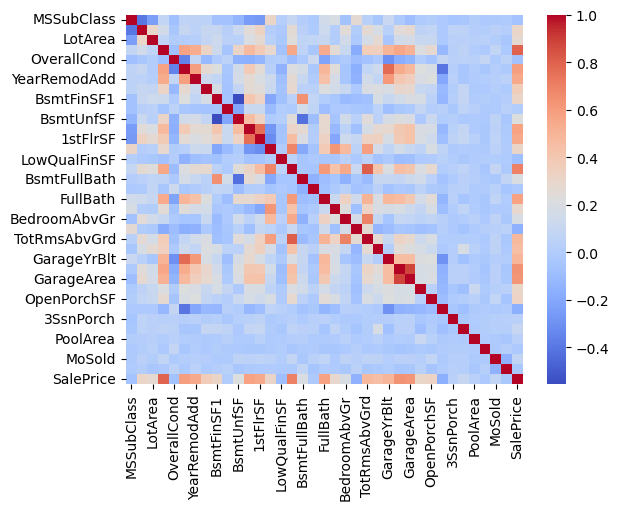

In [69]:
# Draw a heatmap to visualize the correlation matrix with color representing correlation coefficients. 
sns.heatmap(correlation_matrix_pearson, annot=False, cmap='coolwarm')
plt.show()

In [70]:
# Todo:
# - Create a data frame to store variables with high correlation (>0,7) with SalePrice, 
# including columns variable, coefficient, p-value and variable definitions 

In [71]:
print(correlation_matrix_pearson) # For analysis in this step

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.399688 -0.241906     0.076742    -0.078956   
LotFrontage     -0.399688     1.000000  0.303952     0.153689    -0.036275   
LotArea         -0.241906     0.303952  1.000000     0.070012     0.004874   
OverallQual      0.076742     0.153689  0.070012     1.000000    -0.079237   
OverallCond     -0.078956    -0.036275  0.004874    -0.079237     1.000000   
YearBuilt        0.062823     0.100279  0.011226     0.578791    -0.357211   
YearRemodAdd     0.056069     0.048024  0.021041     0.534505     0.088138   
MasVnrArea       0.050447     0.095737  0.084854     0.315558    -0.115746   
BsmtFinSF1      -0.063737     0.096738  0.136073     0.125333    -0.007013   
BsmtFinSF2      -0.067335     0.025994  0.045090    -0.054494     0.046237   
BsmtUnfSF       -0.137492     0.116415  0.032566     0.312417    -0.154866   
TotalBsmtSF     -0.252588     0.246182  0.200655     0.465485   

In [72]:
# Subset the column SalePrice
df_high_corr_saleprice = correlation_matrix_pearson['SalePrice'] 
print(df_high_corr_saleprice) 

MSSubClass      -0.062209
LotFrontage      0.305767
LotArea          0.273295
OverallQual      0.796580
OverallCond     -0.064974
YearBuilt        0.590591
YearRemodAdd     0.548791
MasVnrArea       0.358273
BsmtFinSF1       0.311380
BsmtFinSF2      -0.002191
BsmtUnfSF        0.220214
TotalBsmtSF      0.580338
1stFlrSF         0.545731
2ndFlrSF         0.308023
LowQualFinSF    -0.086129
GrLivArea        0.699267
BsmtFullBath     0.199840
BsmtHalfBath    -0.026522
FullBath         0.574837
HalfBath         0.283826
BedroomAbvGr     0.189288
KitchenAbvGr    -0.155974
TotRmsAbvGrd     0.475618
Fireplaces       0.449015
GarageYrBlt      0.493590
GarageCars       0.639762
GarageArea       0.623248
WoodDeckSF       0.303774
OpenPorchSF      0.321345
EnclosedPorch   -0.162745
3SsnPorch        0.035297
ScreenPorch      0.095838
PoolArea         0.034835
MiscVal         -0.025922
MoSold           0.074497
YrSold          -0.027679
SalePrice        1.000000
Name: SalePrice, dtype: float64


In [73]:
# 1) Drop the row, SalePrice
high_corr_saleprice_dropped = df_high_corr_saleprice.drop(index='SalePrice') 
# Check if SalePrice is dropped 
print(high_corr_saleprice_dropped) 

MSSubClass      -0.062209
LotFrontage      0.305767
LotArea          0.273295
OverallQual      0.796580
OverallCond     -0.064974
YearBuilt        0.590591
YearRemodAdd     0.548791
MasVnrArea       0.358273
BsmtFinSF1       0.311380
BsmtFinSF2      -0.002191
BsmtUnfSF        0.220214
TotalBsmtSF      0.580338
1stFlrSF         0.545731
2ndFlrSF         0.308023
LowQualFinSF    -0.086129
GrLivArea        0.699267
BsmtFullBath     0.199840
BsmtHalfBath    -0.026522
FullBath         0.574837
HalfBath         0.283826
BedroomAbvGr     0.189288
KitchenAbvGr    -0.155974
TotRmsAbvGrd     0.475618
Fireplaces       0.449015
GarageYrBlt      0.493590
GarageCars       0.639762
GarageArea       0.623248
WoodDeckSF       0.303774
OpenPorchSF      0.321345
EnclosedPorch   -0.162745
3SsnPorch        0.035297
ScreenPorch      0.095838
PoolArea         0.034835
MiscVal         -0.025922
MoSold           0.074497
YrSold          -0.027679
Name: SalePrice, dtype: float64


In [74]:
# Add a column name, 'coff' to the values
df_high_corr_saleprice_dropped = pd.DataFrame(high_corr_saleprice_dropped) 
# print(df_high_corr_saleprice_dropped)
df_high_corr_saleprice_dropped.rename(columns={'SalePrice':'coff'}, inplace=True)
print(df_high_corr_saleprice_dropped)


                   coff
MSSubClass    -0.062209
LotFrontage    0.305767
LotArea        0.273295
OverallQual    0.796580
OverallCond   -0.064974
YearBuilt      0.590591
YearRemodAdd   0.548791
MasVnrArea     0.358273
BsmtFinSF1     0.311380
BsmtFinSF2    -0.002191
BsmtUnfSF      0.220214
TotalBsmtSF    0.580338
1stFlrSF       0.545731
2ndFlrSF       0.308023
LowQualFinSF  -0.086129
GrLivArea      0.699267
BsmtFullBath   0.199840
BsmtHalfBath  -0.026522
FullBath       0.574837
HalfBath       0.283826
BedroomAbvGr   0.189288
KitchenAbvGr  -0.155974
TotRmsAbvGrd   0.475618
Fireplaces     0.449015
GarageYrBlt    0.493590
GarageCars     0.639762
GarageArea     0.623248
WoodDeckSF     0.303774
OpenPorchSF    0.321345
EnclosedPorch -0.162745
3SsnPorch      0.035297
ScreenPorch    0.095838
PoolArea       0.034835
MiscVal       -0.025922
MoSold         0.074497
YrSold        -0.027679


In [75]:
# Create a column abs_coff
df_high_corr_saleprice_dropped['abs_coff'] = abs(df_high_corr_saleprice_dropped['coff']) 
print(df_high_corr_saleprice_dropped)

                   coff  abs_coff
MSSubClass    -0.062209  0.062209
LotFrontage    0.305767  0.305767
LotArea        0.273295  0.273295
OverallQual    0.796580  0.796580
OverallCond   -0.064974  0.064974
YearBuilt      0.590591  0.590591
YearRemodAdd   0.548791  0.548791
MasVnrArea     0.358273  0.358273
BsmtFinSF1     0.311380  0.311380
BsmtFinSF2    -0.002191  0.002191
BsmtUnfSF      0.220214  0.220214
TotalBsmtSF    0.580338  0.580338
1stFlrSF       0.545731  0.545731
2ndFlrSF       0.308023  0.308023
LowQualFinSF  -0.086129  0.086129
GrLivArea      0.699267  0.699267
BsmtFullBath   0.199840  0.199840
BsmtHalfBath  -0.026522  0.026522
FullBath       0.574837  0.574837
HalfBath       0.283826  0.283826
BedroomAbvGr   0.189288  0.189288
KitchenAbvGr  -0.155974  0.155974
TotRmsAbvGrd   0.475618  0.475618
Fireplaces     0.449015  0.449015
GarageYrBlt    0.493590  0.493590
GarageCars     0.639762  0.639762
GarageArea     0.623248  0.623248
WoodDeckSF     0.303774  0.303774
OpenPorchSF   

In [76]:
# Reorder the data frame by abs_coff in descending order 
df_high_corr_saleprice_dropped = df_high_corr_saleprice_dropped.sort_values(by='abs_coff', ascending=False)
print(df_high_corr_saleprice_dropped)

                   coff  abs_coff
OverallQual    0.796580  0.796580
GrLivArea      0.699267  0.699267
GarageCars     0.639762  0.639762
GarageArea     0.623248  0.623248
YearBuilt      0.590591  0.590591
TotalBsmtSF    0.580338  0.580338
FullBath       0.574837  0.574837
YearRemodAdd   0.548791  0.548791
1stFlrSF       0.545731  0.545731
GarageYrBlt    0.493590  0.493590
TotRmsAbvGrd   0.475618  0.475618
Fireplaces     0.449015  0.449015
MasVnrArea     0.358273  0.358273
OpenPorchSF    0.321345  0.321345
BsmtFinSF1     0.311380  0.311380
2ndFlrSF       0.308023  0.308023
LotFrontage    0.305767  0.305767
WoodDeckSF     0.303774  0.303774
HalfBath       0.283826  0.283826
LotArea        0.273295  0.273295
BsmtUnfSF      0.220214  0.220214
BsmtFullBath   0.199840  0.199840
BedroomAbvGr   0.189288  0.189288
EnclosedPorch -0.162745  0.162745
KitchenAbvGr  -0.155974  0.155974
ScreenPorch    0.095838  0.095838
LowQualFinSF  -0.086129  0.086129
MoSold         0.074497  0.074497
OverallCond   

## Step 9: Encode Categorical Variables 

In [77]:
# Convert categorical variables into dummy variables 
train_df_dropna_clean2_dummy = pd.get_dummies(train_df_dropna_clean2, drop_first=True) 
train_df_dropna_clean2_dummy.head() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


## Step 10: Scaling and Normalization 

- Normality: Use Q-Q plot to check normality of 'SalePrice' 
- Homoscedasticity: Use scatter plot to check homoscedasticity of 'SalePrice' 
- Linearity: Use scatter plot to check linearity of 'SalePrice' 
- Absence of multicollinearity: Use correlation matrix to check multicollinearity of 'SalePrice' 

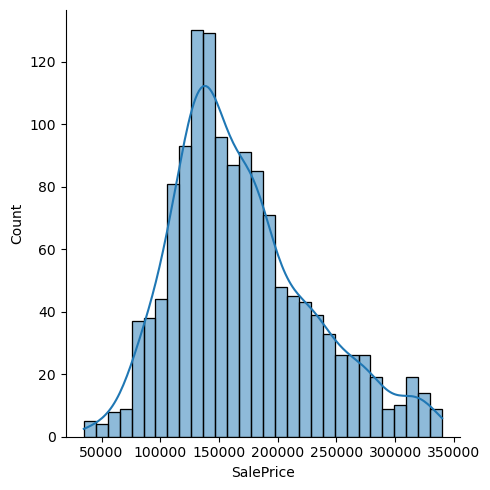

In [78]:
# Histogram and normal probability plot for SalePrice 
sns.displot(train_df_dropna_clean2['SalePrice'], bins=30, kde=True) 
plt.show() 

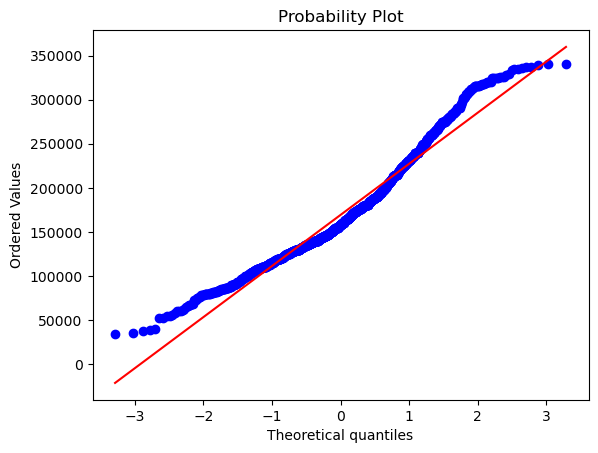

In [79]:
# Normal probability plot 
stats.probplot(train_df_dropna_clean2['SalePrice'], plot=plt) 
plt.show() 

The variable, 'SalePrice', is not normally distributed. The Q-Q plot shows that the data points do not fall on the straight line.

I will apply a log transformation to 'SalePrice' to make it more normally distributed. 

In [80]:
# Apply log transformation to SalePrice 
train_df_dropna_clean2['SalePrice_log'] = np.log(train_df_dropna_clean2['SalePrice']) 


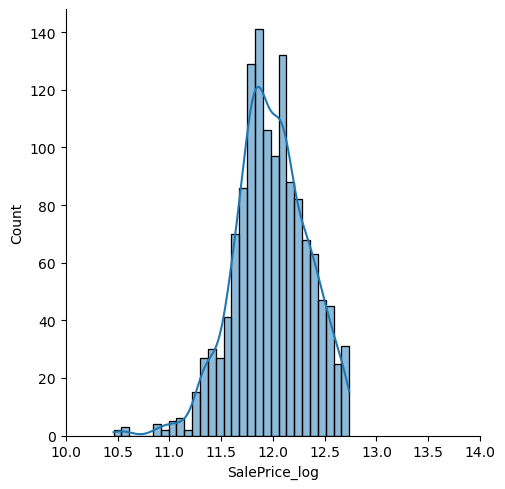

In [81]:
# Histogram and normal probability plot for SalePrice_log
sns.displot(train_df_dropna_clean2['SalePrice_log'], bins=30, kde=True) 
plt.xlim(10, 14) 
plt.show() 

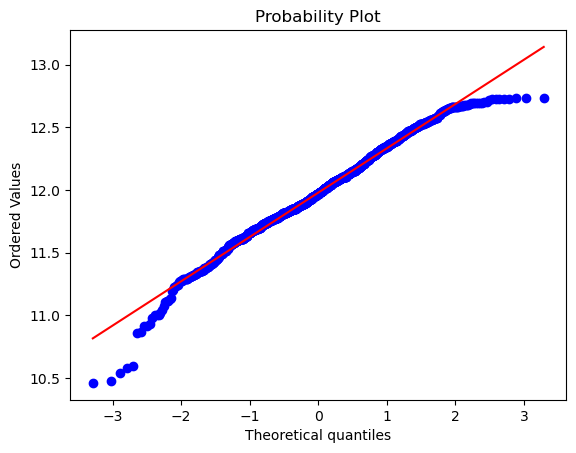

In [82]:
# Normal probability plot 
stats.probplot(train_df_dropna_clean2['SalePrice_log'], plot=plt) 
plt.show() 

Looks like the log transformation has improved the normality of 'SalePrice'. 

Next, check out 'GrLivArea' to see if they meet the assumptions of normality.

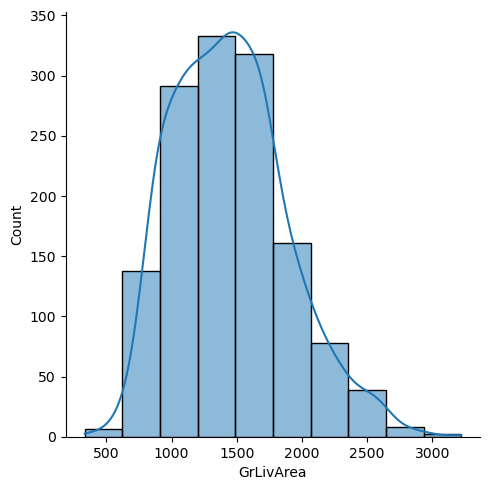

In [83]:
# Histogram for 'GrLivArea' 
sns.displot(train_df_dropna_clean2['GrLivArea'], bins=10, kde=True) 
plt.show() 

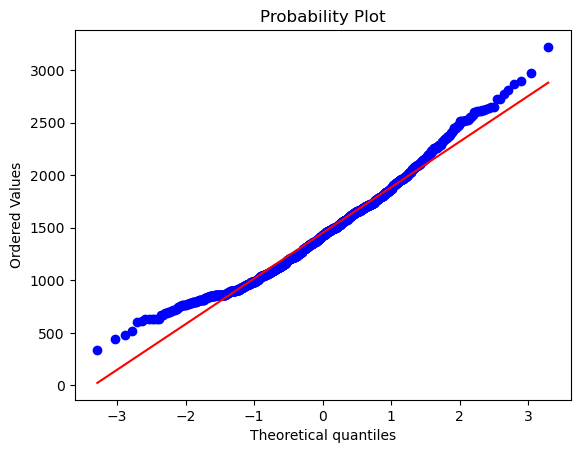

In [84]:
# Normal probability plot for 'GrLivArea' 
stats.probplot(train_df_dropna_clean2['GrLivArea'], plot=plt) 
plt.show() 

The variable 'GrLivArea' is not normally distributed. The Q-Q plot shows that the data points do not fall on the straight line. 

I will apply a log transformation to 'GrLivArea' to make it more normally distributed.

In [85]:
# Apply log transformation to 'GrLivArea' 
train_df_dropna_clean2['GrLivArea_log'] = np.log(train_df_dropna_clean2['GrLivArea']) 

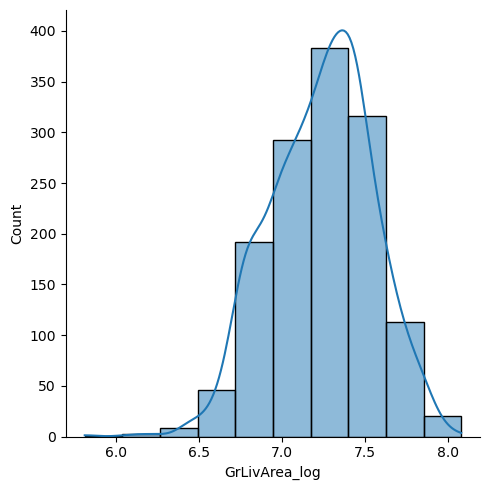

In [86]:
# Histogram and normal probability plot for 'GrLivArea_log'
sns.displot(train_df_dropna_clean2['GrLivArea_log'], bins=10, kde=True)
plt.show() 

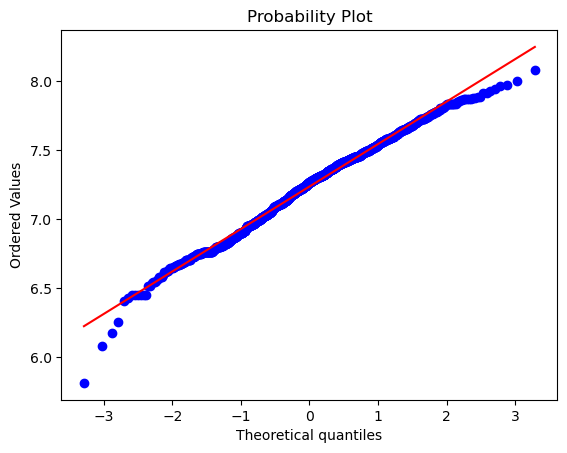

In [87]:
# Normal probability plot for 'GrLivArea_log' 
stats.probplot(train_df_dropna_clean2['GrLivArea_log'], plot=plt) 
plt.show() 

Investigate the relationship between 'GrLivArea' and 'SalePrice' to check for homoscedasticity and linearity. 

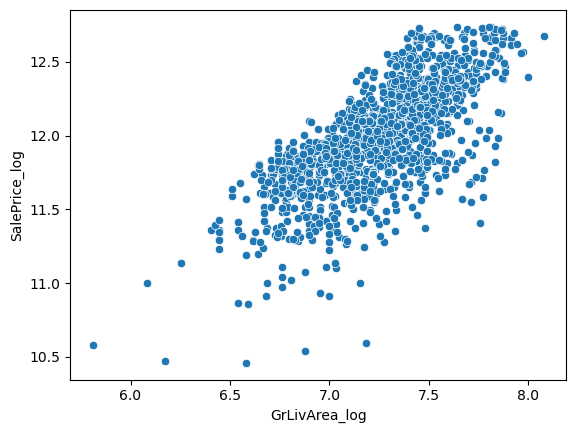

In [88]:
# Scatter plot for 'GrLivArea_log' and 'SalePrice_log' 
sns.scatterplot(x='GrLivArea_log', y='SalePrice_log', data=train_df_dropna_clean2) 
plt.show() 

We can see that the relationship between 'GrLivArea' and 'SalePrice' is not homoscedastic. The scatter plot shows that the spread of the residuals increases as 'GrLivArea' increases.

## Step 11: Feature Analysis and Selection 

Feature analysis and selection: Identify features with low variance or high multicollinearity and consider removing them 

In [95]:
# Using Pandas to calculate variance 

numeric_features = train_df_dropna_clean2.select_dtypes(include=[np.number]) # Select numeric variables
print(numeric_features)  


        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  EnclosedPorch  \
0          2003          2003     

In [104]:
# Calculate variance for each numeric variable 
variance_numeric_features = numeric_features.var() 
# print(variance_numeric_features)
low_variance_numeric_features = variance_numeric_features[variance_numeric_features < 0.01].index
print(low_variance_numeric_features)  # Variables with low variance 


Index([], dtype='object')


In [105]:
# Identify features with high multicollinearity 

# Compute the correlation matrix 
corr_matrix = numeric_features.corr().abs() 

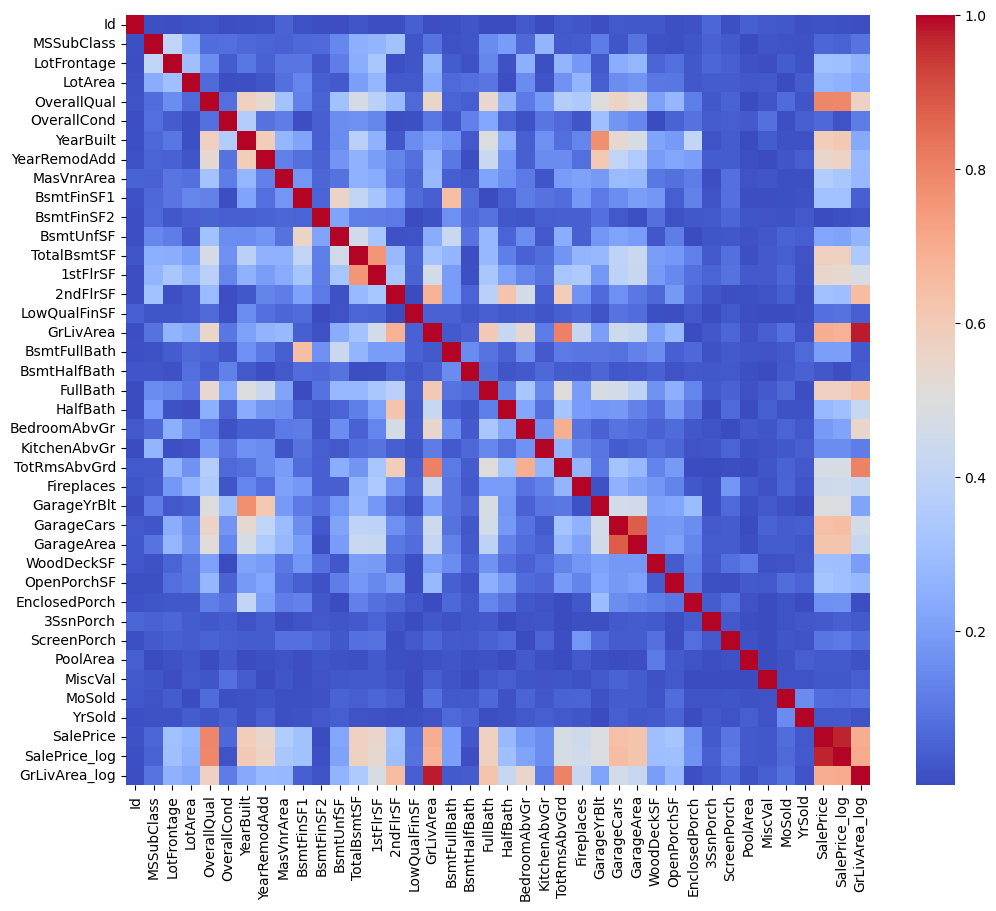

In [106]:
# Plot the heatmap of the correlation matrix 
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm') 
plt.show() 

A simple method to visually inspect multicollinearity is by calculating the correlation matrix. A high correlation between two or more features (e.g., > 0.8) is a sign of multicollinearity.

In [108]:
# Alternative method to identify features with high multicollinearity - Variance Inflation Factor (VIF) 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Create a data frame to store VIF 
vif_data = pd.DataFrame() 
vif_data["feature"] = numeric_features.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(len(numeric_features.columns))] 

print(vif_data.sort_values(by="VIF", ascending=False))  

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          feature           VIF
13       1stFlrSF           inf
11      BsmtUnfSF           inf
16      GrLivArea           inf
15   LowQualFinSF           inf
14       2ndFlrSF           inf
12    TotalBsmtSF           inf
9      BsmtFinSF1           inf
10     BsmtFinSF2           inf
36         YrSold  4.406978e+04
38  SalePrice_log  3.300214e+04
6       YearBuilt  2.453810e+04
25    GarageYrBlt  2.299682e+04
7    YearRemodAdd  2.255873e+04
39  GrLivArea_log  2.114907e+04
37      SalePrice  2.599373e+02
23   TotRmsAbvGrd  8.905990e+01
4     OverallQual  8.401177e+01
5     OverallCond  5.092109e+01
22   KitchenAbvGr  3.850255e+01
26     GarageCars  3.663696e+01
21   BedroomAbvGr  3.509881e+01
27     GarageArea  3.224791e+01
19       FullBath  2.683679e+01
2     LotFrontage  1.863298e+01
35         MoSold  6.642080e+00
1      MSSubClass  5.055498e+00
0              Id  4.101405e+00
3         LotArea  3.981849e+00
17   BsmtFullBath  3.599693e+00
20       HalfBath  3.529793e+00
24     F

VIF Interpretation:
- VIF = 1: No correlation with other variables
- VIF between 1 and 5: Moderate correlation (usually acceptable)
- VIF > 5: High correlation (multicollinearity is likely present)
- VIF > 10: Severe multicollinearity (should be addressed)

VIF values indicate how much the variance of a feature’s coefficient is inflated due to multicollinearity. 